# QUESTION: Which pathway should I choose if I want to have a good finance by age 40? Go to CU Boulder or UCCS?
# This study compares two college pathways—CU Boulder and UCCS—to determine which leads to a better expected financial position by age 40. The random variables include yearly income and yearly housing costs, each modeled with a mean and standard deviation to reflect uncertainty. College lasts four years with no income, followed by eighteen working years across four career stages: starting, mid-level, senior, and manager. Housing costs differ between pathways—dorms for CU Boulder and cheaper apartments for UCCS—while post-college housing and career incomes are the same for both. The simulation combines these variables by subtracting total housing costs from total lifetime income to estimate each person’s net financial position. By running many trials, we can find the average (mean) expected value and compare which pathway provides a stronger financial outcome at age 40.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
np.random.seed()  # new random trial each run

college_years = 4
work_years = 18

# College housing (means, stds)
dorm_mu, dorm_sigma = 35000, 2000   # CU Boulder
apt_mu, apt_sigma = 22000, 3000     # UCCS
own_mu, own_sigma = 32000, 3500     # after college

# Salaries (means, stds)
start_mu, start_sigma = 75000, 8000
mid_mu, mid_sigma = 110000, 15000
senior_mu, senior_sigma = 140000, 20000
manager_mu, manager_sigma = 180000, 25000

# Years in each role
start_years, mid_years, senior_years, manager_years = 1, 7, 7, 3


# --- FUNCTION TO RUN ONE TRIAL ---
def one_trial(college_mu, college_sigma):
    # College housing (no income during college)
    college_cost = np.sum(np.random.normal(college_mu, college_sigma, college_years))
    
    # Post-college housing
    post_cost = np.sum(np.random.normal(own_mu, own_sigma, work_years))
    total_cost = college_cost + post_cost
    
    # Income across all career stages
    income = (
        np.sum(np.random.normal(start_mu, start_sigma, start_years)) +
        np.sum(np.random.normal(mid_mu, mid_sigma, mid_years)) +
        np.sum(np.random.normal(senior_mu, senior_sigma, senior_years)) +
        np.sum(np.random.normal(manager_mu, manager_sigma, manager_years))
    )
    
    net = income - total_cost
    return {"income": income, "cost": total_cost, "net": net}


# --- RUN ONE TRIAL FOR EACH PATHWAY ---
cu_trial = one_trial(dorm_mu, dorm_sigma)
uccs_trial = one_trial(apt_mu, apt_sigma)

# --- PRINT RESULTS ---
print("One Trial — CU Boulder")
for k, v in cu_trial.items():
    print(f"  {k.capitalize()}: ${v:,.0f}")

print("\nOne Trial — UCCS")
for k, v in uccs_trial.items():
    print(f"  {k.capitalize()}: ${v:,.0f}")

One Trial — CU Boulder
  Income: $2,411,581
  Cost: $735,381
  Net: $1,676,199

One Trial — UCCS
  Income: $2,464,334
  Cost: $630,476
  Net: $1,833,858


=== Simulation Summary (100 Trials) ===
            CU_Net      UCCS_Net  Prob(UCCS > CU)
Mean  1.644165e+06  1.704234e+06             0.68

Sample of first 10 trials:

   Trial        CU_Net      UCCS_Net Better_Option
0      1  1.758030e+06  1.715856e+06    CU Boulder
1      2  1.611158e+06  1.867693e+06          UCCS
2      3  1.657100e+06  1.880177e+06          UCCS
3      4  1.602128e+06  1.614369e+06          UCCS
4      5  1.538713e+06  1.700949e+06          UCCS
5      6  1.813826e+06  1.669624e+06    CU Boulder
6      7  1.663221e+06  1.600401e+06    CU Boulder
7      8  1.632607e+06  1.713382e+06          UCCS
8      9  1.538755e+06  1.729777e+06          UCCS
9     10  1.621320e+06  1.638358e+06          UCCS


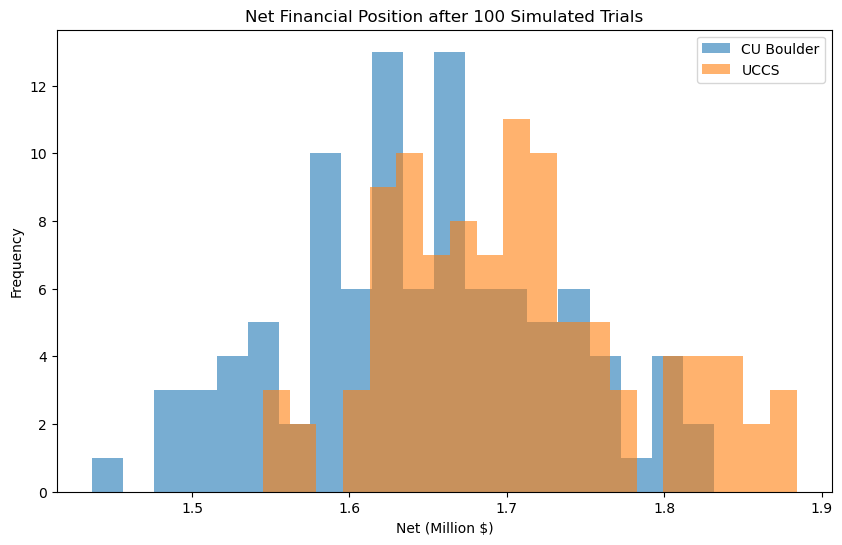

In [8]:
np.random.seed(42)   # for reproducibility
N = 100              # number of simulated trials (students)

# --- PARAMETERS ---
college_years = 4
work_years = 18      # ages 22–40

# Housing (means and stds)
dorm_mu, dorm_sigma = 35000, 2000   # CU Boulder
apt_mu, apt_sigma = 22000, 3000     # UCCS
own_mu, own_sigma = 32000, 3500     # post-college

# Salaries (means and stds)
start_mu, start_sigma = 75000, 8000
mid_mu, mid_sigma = 110000, 15000
senior_mu, senior_sigma = 140000, 20000
manager_mu, manager_sigma = 180000, 25000

# Career stage durations
start_years, mid_years, senior_years, manager_years = 1, 7, 7, 3


# --- FUNCTION TO RUN ONE PATHWAY SIMULATION ---
def simulate_pathway(college_mu, college_sigma, N):
    # College housing costs (no income)
    college_costs = np.random.normal(college_mu, college_sigma, size=(N, college_years)).sum(axis=1)
    # Post-college housing costs
    post_costs = np.random.normal(own_mu, own_sigma, size=(N, work_years)).sum(axis=1)
    total_costs = college_costs + post_costs

    # Income simulation for each career stage
    income = (
        np.random.normal(start_mu, start_sigma, size=(N, start_years)).sum(axis=1)
        + np.random.normal(mid_mu, mid_sigma, size=(N, mid_years)).sum(axis=1)
        + np.random.normal(senior_mu, senior_sigma, size=(N, senior_years)).sum(axis=1)
        + np.random.normal(manager_mu, manager_sigma, size=(N, manager_years)).sum(axis=1)
    )

    net = income - total_costs
    return net, income, total_costs


# --- RUN SIMULATIONS ---
net_cu, income_cu, cost_cu = simulate_pathway(dorm_mu, dorm_sigma, N)
net_uccs, income_uccs, cost_uccs = simulate_pathway(apt_mu, apt_sigma, N)

# --- CREATE A RESULTS TABLE ---
results = pd.DataFrame({
    "Trial": range(1, N+1),
    "CU_Net": net_cu,
    "UCCS_Net": net_uccs
})
results["Better_Option"] = np.where(results["UCCS_Net"] > results["CU_Net"], "UCCS", "CU Boulder")

# --- SUMMARY ---
summary = results[["CU_Net", "UCCS_Net"]].mean().to_frame("Mean").T
summary["Prob(UCCS > CU)"] = (results["Better_Option"] == "UCCS").mean()

# --- PRINT RESULTS ---
print("=== Simulation Summary (100 Trials) ===")
print(summary)
print("\nSample of first 10 trials:\n")
print(results.head(10))

# --- VISUALIZE ---
plt.figure(figsize=(10,6))
plt.hist(results["CU_Net"]/1e6, bins=20, alpha=0.6, label="CU Boulder")
plt.hist(results["UCCS_Net"]/1e6, bins=20, alpha=0.6, label="UCCS")
plt.title("Net Financial Position after 100 Simulated Trials")
plt.xlabel("Net (Million $)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

/tmp/ipykernel_160/1095290945.py:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_melt, x="Pathway", y="Net Worth", estimator=np.mean, ci="sd", palette=["#1f77b4", "#ff7f0e"])


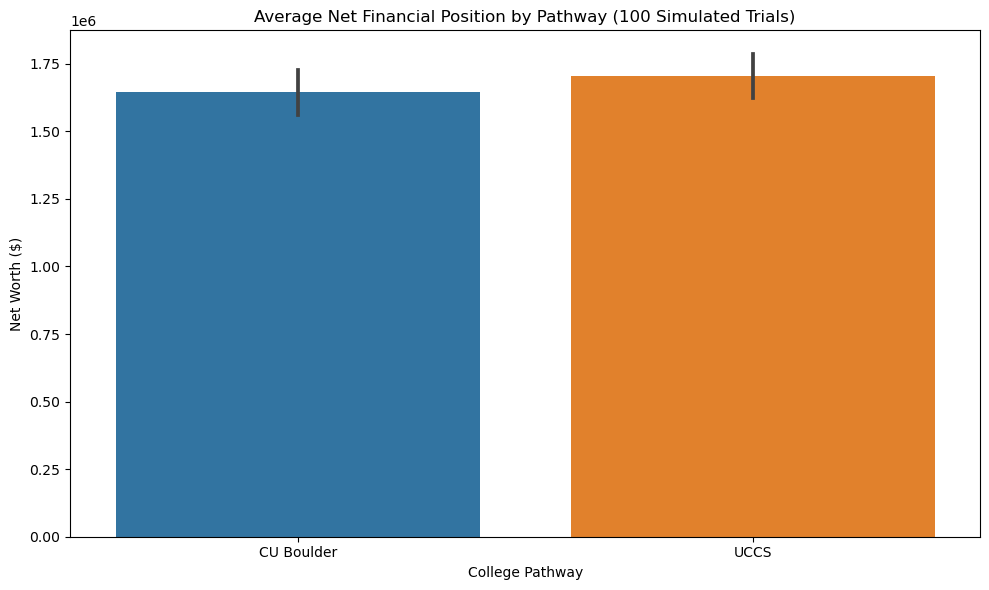

In [9]:
np.random.seed(42)
N = 100  # number of trials

# --- PARAMETERS ---
college_years = 4
work_years = 18

# Housing (mean, std)
dorm_mu, dorm_sigma = 35000, 2000    # CU Boulder dorms
apt_mu, apt_sigma = 22000, 3000      # UCCS apartments
own_mu, own_sigma = 32000, 3500      # post-college housing

# Income (mean, std)
start_mu, start_sigma = 75000, 8000
mid_mu, mid_sigma = 110000, 15000
senior_mu, senior_sigma = 140000, 20000
manager_mu, manager_sigma = 180000, 25000

# Years in each stage
start_years, mid_years, senior_years, manager_years = 1, 7, 7, 3

# --- SIMULATION FUNCTION ---
def simulate_pathway(college_mu, college_sigma, N):
    college_costs = np.random.normal(college_mu, college_sigma, size=(N, college_years)).sum(axis=1)
    post_costs = np.random.normal(own_mu, own_sigma, size=(N, work_years)).sum(axis=1)
    total_costs = college_costs + post_costs

    income = (
        np.random.normal(start_mu, start_sigma, size=(N, start_years)).sum(axis=1)
        + np.random.normal(mid_mu, mid_sigma, size=(N, mid_years)).sum(axis=1)
        + np.random.normal(senior_mu, senior_sigma, size=(N, senior_years)).sum(axis=1)
        + np.random.normal(manager_mu, manager_sigma, size=(N, manager_years)).sum(axis=1)
    )

    net = income - total_costs
    return net

# --- RUN SIMULATION ---
cu_net = simulate_pathway(dorm_mu, dorm_sigma, N)
uccs_net = simulate_pathway(apt_mu, apt_sigma, N)

# --- CREATE DATAFRAME ---
df = pd.DataFrame({
    "Trial": range(1, N + 1),
    "CU Boulder": cu_net,
    "UCCS": uccs_net
})

# Melt to long format for seaborn
df_melt = df.melt(id_vars="Trial", var_name="Pathway", value_name="Net Worth")

# --- BAR GRAPH ---
plt.figure(figsize=(10,6))
sns.barplot(data=df_melt, x="Pathway", y="Net Worth", estimator=np.mean, ci="sd", palette=["#1f77b4", "#ff7f0e"])
plt.title("Average Net Financial Position by Pathway (100 Simulated Trials)")
plt.ylabel("Net Worth ($)")
plt.xlabel("College Pathway")
plt.tight_layout()
plt.show()